___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

#plt.rcParams['figure.dpi'] = 100

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from xgboost import plot_importance
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding='latin-1')

In [4]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding='latin-1')

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [6]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [7]:
df_male.columns = df_male.columns.str.lower()

In [8]:
df_male.shape

(4082, 108)

In [9]:
df_female.columns = df_male.columns.str.lower()

In [10]:
df_female.shape

(1986, 108)

In [11]:
df = pd.concat([df_male,df_female])

In [12]:
df = df.reset_index(drop=True)

In [13]:
df.drop(["subjectid"], axis=1, inplace=True)

In [14]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,266,1467,337,222,1347,253,202,401,369,274,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
6064,262,1324,301,202,1204,236,181,378,294,287,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
6065,260,1334,318,213,1259,234,183,363,332,299,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
6066,205,1293,302,199,1207,213,163,376,276,280,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 107 entries, abdominalextensiondepthsitting to writingpreference
dtypes: int64(98), object(9)
memory usage: 5.0+ MB


In [16]:
df.describe().T[:50]

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0
bicristalbreadth,6068.0,274.735003,19.221034,197.0,262.00,274.0,288.00,362.0


In [17]:
df.isnull().sum()[(df.isnull().sum() != 0)]

ethnicity    4647
dtype: int64

In [18]:
df.select_dtypes(include="object").columns

Index(['gender', 'date', 'installation', 'component', 'branch', 'primarymos',
       'subjectsbirthlocation', 'ethnicity', 'writingpreference'],
      dtype='object')

In [19]:
df.drop(df[df.dodrace>3].index, inplace=True)

In [20]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
Name: dodrace, dtype: int64

In [21]:
df.drop(["subjectnumericrace"], axis=1, inplace=True)

In [22]:
df.drop(["ethnicity"], axis=1, inplace=True)

In [23]:
num_columns = df.select_dtypes(include="number").columns

## Explore Data

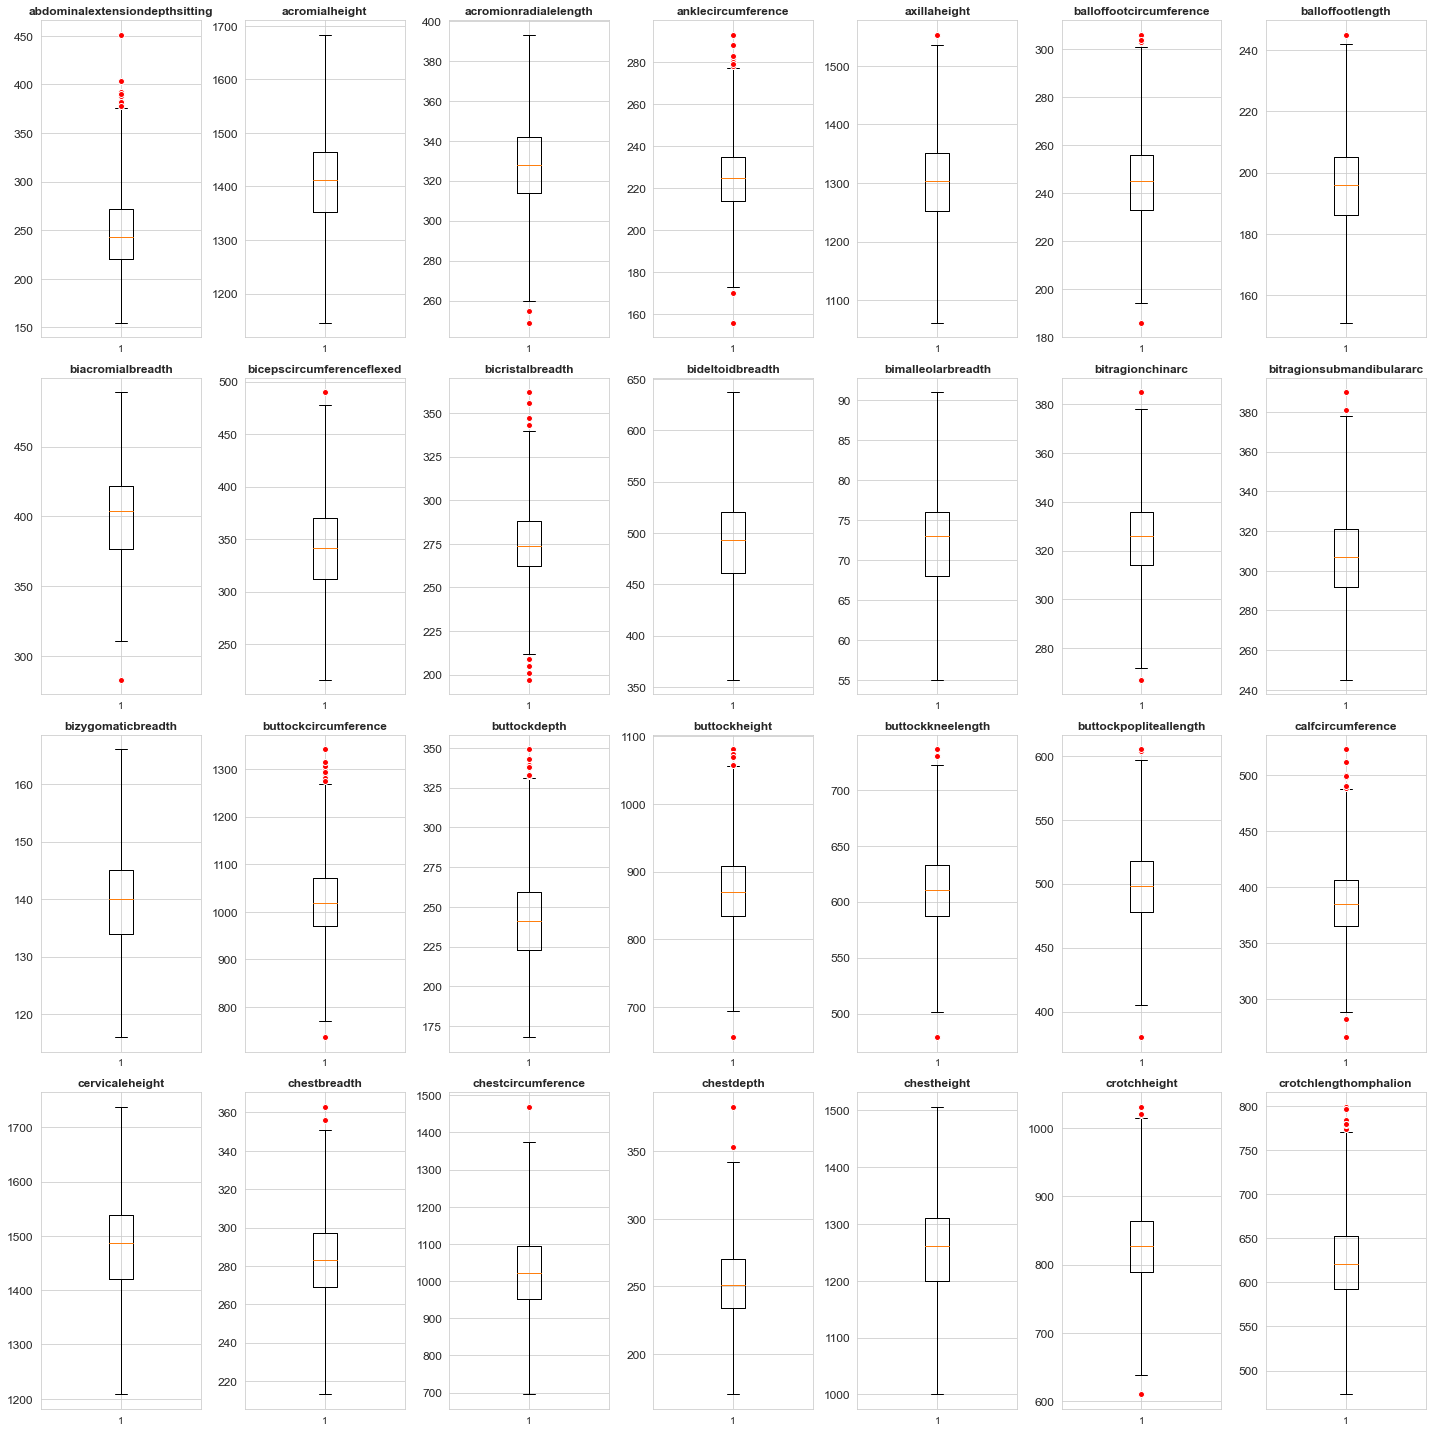

In [24]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(4, 7, figsize=(20,20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df[num_columns[i]], flierprops=red_circle, whis=2)
    ax.set_title(num_columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

In [25]:
df.drop(['heightin', 'weightlbs'], axis=1, inplace=True)

In [26]:
df.select_dtypes(include='object').columns

Index(['gender', 'date', 'installation', 'component', 'branch', 'primarymos',
       'subjectsbirthlocation', 'writingpreference'],
      dtype='object')

In [27]:
df.drop(['installation', 'component', 'branch', 'primarymos', 'date'],axis=1,inplace=True)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [183]:
X = df.drop('dodrace', axis=1)
def dodrace_trans(a):
    if a==1:
        return "white"
    elif a==2:
        return "black"
    else: 
        return "Hispanic"
y = df["dodrace"].apply(lambda x: dodrace_trans(x))

In [184]:
X = pd.get_dummies(data=X, drop_first=True)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify = y)

In [31]:
df_ord = df.copy()
df_ord["dodrace"] = df_ord["dodrace"].apply(lambda x: dodrace_trans(x))

categorical_features = df.select_dtypes(include='object').columns

enc = OrdinalEncoder()

df_ord[categorical_features] = enc.fit_transform(df_ord[categorical_features])

In [32]:
X2=df_ord.drop(["dodrace"], axis=1)
y2=df_ord["dodrace"]

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, stratify=y, random_state=5)

**Scaling**

In [186]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Pipeline Method Notes**

categorical_features = df.select_dtypes(include='object').columns

numeric_features = df.select_dtypes(include = "number").drop('dodrace', axis=1).columns

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

**Metric Functions**

In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("--------------------------------------")
    print("Confusion_matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("classification_report")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("--------------------------------------")
    print("Confusion_matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("classification_report")
    print(classification_report(y_train, y_train_pred))
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.flatten()
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0])
    ax[0].title.set_text("Test Confusion Matrix")
    plot_confusion_matrix(model, X_train, y_train, ax=ax[1])
    ax[1].title.set_text("Train Confusion Matrix")
    plt.tight_layout()

In [167]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name:{"f1_Hispanic" : f1_score(y_test, y_pred, average=None, labels=["Hispanic"]),
           "precision_Hispanic" : precision_score(y_test, y_pred, average=None, labels=["Hispanic"]),
           "recall_Hispanic" : recall_score(y_test, y_pred, average=None, labels=["Hispanic"])}}
    return pd.DataFrame(scores)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

log_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

log_model.fit(X_train, y_train)
print("model score: %.3f" % log_model.score(X_test, y_test))

In [37]:
log_model=LogisticRegression(class_weight= "balanced",max_iter=10000,random_state=5)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[106   7  23]
 [ 13 241   6]
 [ 85  12 661]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.52      0.78      0.62       136
       black       0.93      0.93      0.93       260
       white       0.96      0.87      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 464   14   65]
 [  34  976   28]
 [ 365   64 2605]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.54      0.85      0.66       543
       black       0.93      0.94      0.93      1038
       white       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg 

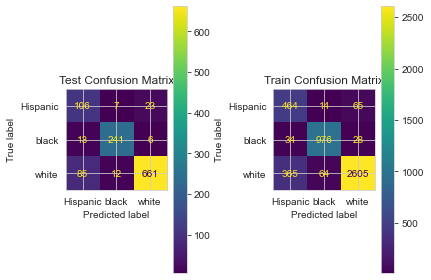

In [38]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

### Logistic Model GridsearchCV

In [39]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

model_lg = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=5)

param_grid = {
    "C": [0.08,0.1,0.15],
    'penalty': ["l1", "l2"],
    'solver': ['liblinear', 'lbfgs'],
}

log_grid_model = GridSearchCV(model_lg, param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)
log_grid_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=5),
             n_jobs=-1,
             param_grid={'C': [0.08, 0.1, 0.15], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [40]:
log_grid_model.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Test_Set
--------------------------------------
Confusion_matrix: 
[[109   7  20]
 [ 11 241   8]
 [ 82  11 665]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.54      0.80      0.64       136
       black       0.93      0.93      0.93       260
       white       0.96      0.88      0.92       758

    accuracy                           0.88      1154
   macro avg       0.81      0.87      0.83      1154
weighted avg       0.90      0.88      0.89      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 463   17   63]
 [  32  980   26]
 [ 354   61 2619]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.55      0.85      0.67       543
       black       0.93      0.94      0.94      1038
       white       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg 

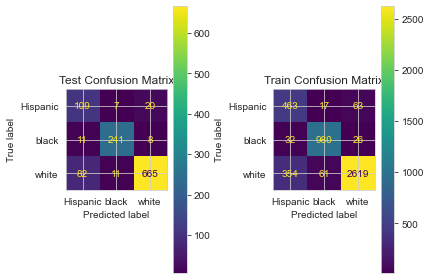

In [41]:
eval_metric(log_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [168]:
log = metric_df(log_grid_model, X_train_scaled, y_train, X_test_scaled, y_test, 'LOG')
log

,LOG
f1_Hispanic,[0.6449704142011835]
precision_Hispanic,[0.5396039603960396]
recall_Hispanic,[0.8014705882352942]


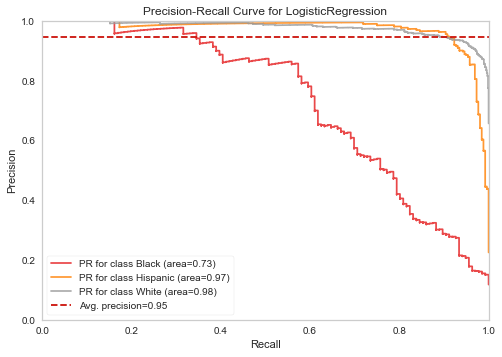

In [43]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    log_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

In [44]:
viz.score_

{'Black': 0.7338492544235883,
 'Hispanic': 0.9722667758876571,
 'White': 0.9781957271719764,
 'micro': 0.9460614754203931}

## 2. KNN

### Vanilla Model KNN

In [45]:
test_error_rates = []

for k in range(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

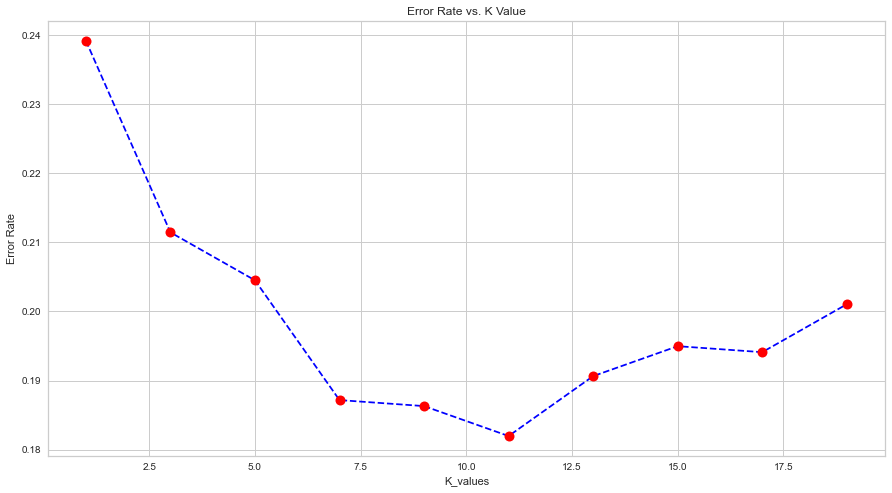

In [46]:
plt.figure(figsize=(15,8))
plt.plot(range(1,20,2), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.show()

**It is seen that best K value is 11.**

WITH K=11

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 58   5  73]
 [  6 159  95]
 [ 11  20 727]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.77      0.43      0.55       136
       black       0.86      0.61      0.72       260
       white       0.81      0.96      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.67      0.72      1154
weighted avg       0.82      0.82      0.80      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 264   17  262]
 [  31  617  390]
 [  47   72 2915]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.77      0.49      0.60       543
       black       0.87      0.59      0.71      1038
       white       0.82      0.96      0.88      3034

    accuracy                           0.82      4615
   macro avg       0.82      0.68      0.73      4615
we

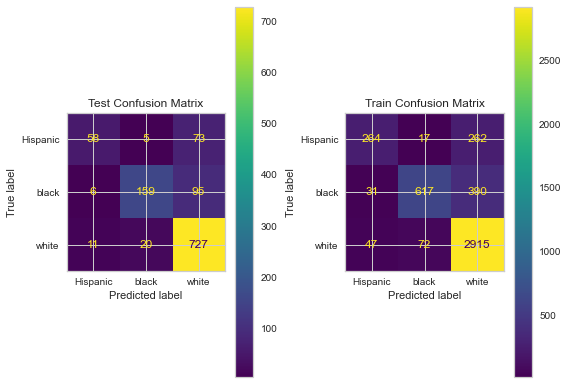

In [47]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaled,y_train)
print('WITH K=11\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

### GridSearchCV KNN

In [48]:
knn_grid = KNeighborsClassifier()

k_values= range(1,20,2)

param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= recall_Hispanic)

knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [49]:
knn_grid_model.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

WITH K=3

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 71   4  61]
 [ 19 159  82]
 [ 58  20 680]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.48      0.52      0.50       136
       black       0.87      0.61      0.72       260
       white       0.83      0.90      0.86       758

    accuracy                           0.79      1154
   macro avg       0.72      0.68      0.69      1154
weighted avg       0.80      0.79      0.79      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 385   13  145]
 [  59  758  221]
 [  89   48 2897]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.72      0.71      0.72       543
       black       0.93      0.73      0.82      1038
       white       0.89      0.95      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.85      0.80      0.82      4615
wei

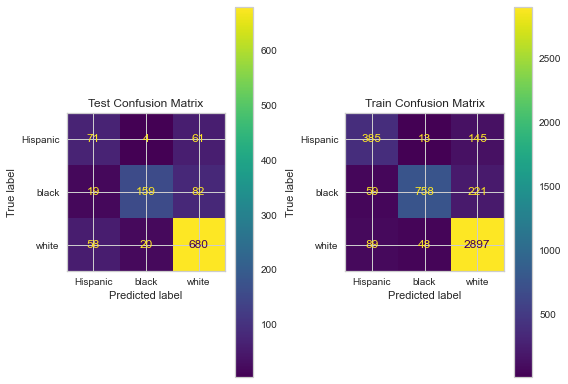

In [50]:
print('WITH K=3\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [169]:
knn_df = metric_df(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test, 'KNN')
knn_df

,KNN
f1_Hispanic,[0.5]
precision_Hispanic,[0.4797297297297297]
recall_Hispanic,[0.5220588235294118]


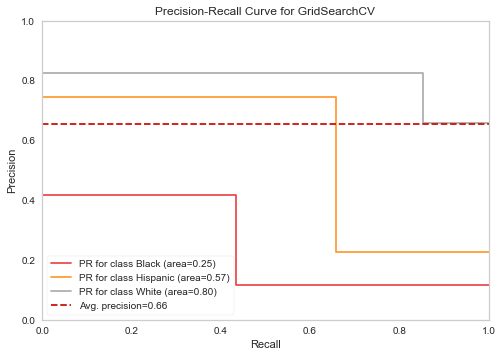

In [52]:
viz = PrecisionRecallCurve(
    knn_grid_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

## 3. SVC

### Vanilla SVC model 

In [53]:
svm_model = SVC(class_weight="balanced",random_state=5)
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[109   7  20]
 [ 12 232  16]
 [ 80  15 663]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.54      0.80      0.65       136
       black       0.91      0.89      0.90       260
       white       0.95      0.87      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.89      0.87      0.88      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 488    9   46]
 [  26  987   25]
 [ 306   39 2689]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.60      0.90      0.72       543
       black       0.95      0.95      0.95      1038
       white       0.97      0.89      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.87      4615
weighted avg 

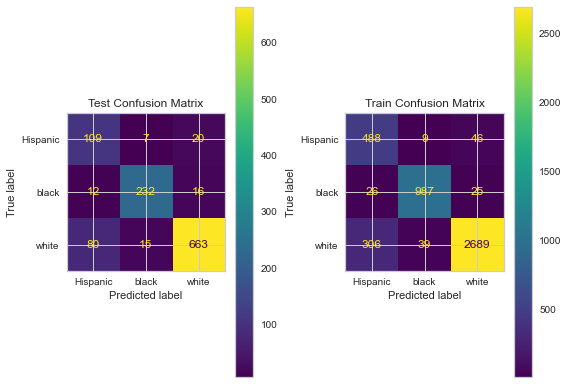

In [54]:
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

###  SVC Model GridsearchCV

In [69]:
param_grid = {'C': [0.1,0.2],
              'gamma': ['scale',1],
              'kernel': ['rbf','linear']
             }

svm_model = SVC(class_weight="balanced",random_state=5)

svm_model_grid = GridSearchCV(svm_model, param_grid, cv=5,scoring=recall_Hispanic, n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=5),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2], 'gamma': ['scale', 1],
                         'kernel': ['rbf', 'linear']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [70]:
svm_model_grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Test_Set
--------------------------------------
Confusion_matrix: 
[[108   9  19]
 [ 15 236   9]
 [ 81  10 667]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.53      0.79      0.64       136
       black       0.93      0.91      0.92       260
       white       0.96      0.88      0.92       758

    accuracy                           0.88      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.88      0.88      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 470   14   59]
 [  30  982   26]
 [ 365   55 2614]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.54      0.87      0.67       543
       black       0.93      0.95      0.94      1038
       white       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg 

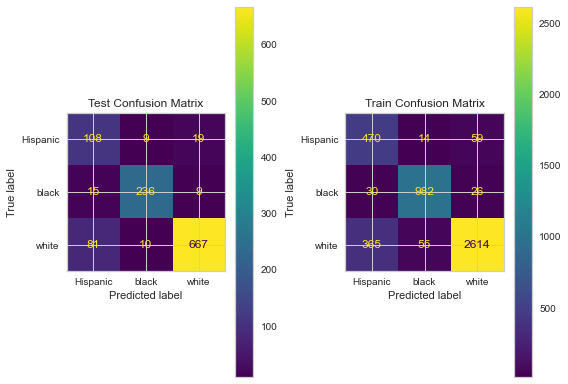

In [71]:
eval_metric(svm_model_grid, X_train_scaled, y_train, X_test_scaled, y_test)

In [73]:
svm_model = SVC(class_weight="balanced",random_state=5)
svm_model.fit(X_train_scaled, y_train)
svm_df = metric_df(svm_model, X_train_scaled, y_train, X_test_scaled, y_test, 'SVM')
svm_df

,SVM
f1_Hispanic,[0.6468842729970326]
precision_Hispanic,[0.5422885572139303]
recall_Hispanic,[0.8014705882352942]


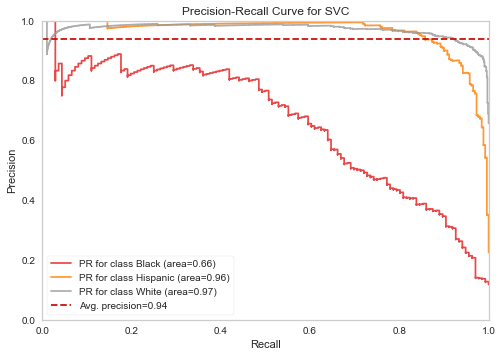

In [74]:
viz = PrecisionRecallCurve(
    svm_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

## 4 Decision Tree

### Vanilla Model DT

In [75]:
model_tree = DecisionTreeClassifier(class_weight="balanced",random_state=5)

model_tree.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight='balanced', random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 48  16  72]
 [ 17 161  82]
 [ 86  81 591]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.32      0.35      0.33       136
       black       0.62      0.62      0.62       260
       white       0.79      0.78      0.79       758

    accuracy                           0.69      1154
   macro avg       0.58      0.58      0.58      1154
weighted avg       0.70      0.69      0.70      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
classification_report
              precision    recall  f1-score   support

    Hispanic       1.00      1.00      1.00       543
       black       1.00      1.00      1.00      1038
       white       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg 

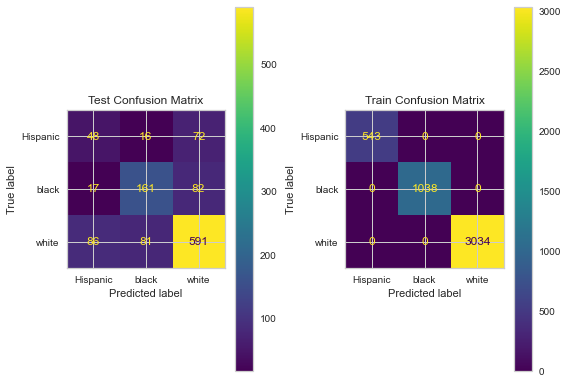

In [76]:
eval_metric(model_tree, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV DT

In [77]:
X_train2.shape

(4615, 97)

In [78]:
model_t = DecisionTreeClassifier(class_weight="balanced", random_state=5)

param_grid = {"splitter":["best", "random"],
              "max_features":[1,2,3],
              "max_depth": [2,3,4],
                           "min_samples_leaf": [1, 2],
              "min_samples_split": [2,3,4]}
             

model_grid_tree = GridSearchCV(estimator=model_t,
                          param_grid=param_grid,
                          scoring=recall_Hispanic,
                          cv=10,
                          n_jobs = -1)
model_grid_tree.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=5),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [79]:
model_grid_tree.best_params_

{'max_depth': 2,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Test_Set
--------------------------------------
Confusion_matrix: 
[[111  25   0]
 [163  97   0]
 [497 261   0]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.14      0.82      0.24       136
       black       0.25      0.37      0.30       260
       white       0.00      0.00      0.00       758

    accuracy                           0.18      1154
   macro avg       0.13      0.40      0.18      1154
weighted avg       0.07      0.18      0.10      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 448   95    0]
 [ 652  386    0]
 [1992 1042    0]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.14      0.83      0.25       543
       black       0.25      0.37      0.30      1038
       white       0.00      0.00      0.00      3034

    accuracy                           0.18      4615
   macro avg       0.13      0.40      0.18      4615
weighted avg 

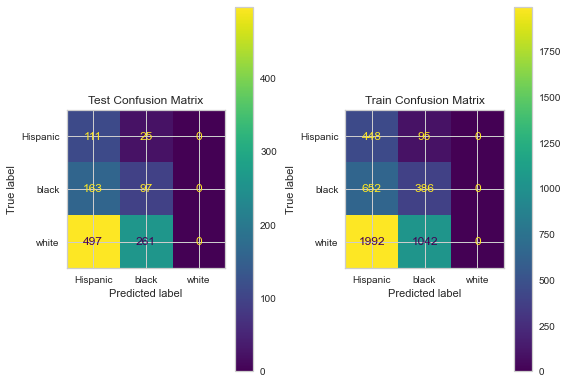

In [80]:
eval_metric(model_grid_tree, X_train2, y_train2, X_test2, y_test2)

In [81]:
dt_df = metric_df(model_grid_tree, X_train2, y_train2, X_test2, y_test2, 'DT')
dt_df

,DT
f1_Hispanic,[0.24476295479603086]
precision_Hispanic,[0.14396887159533073]
recall_Hispanic,[0.8161764705882353]


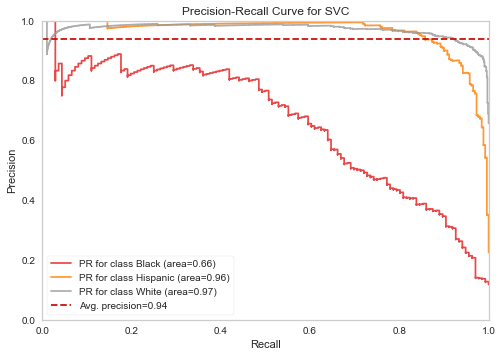

In [82]:
viz = PrecisionRecallCurve(
    svm_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

## 5. RF

### Vanilla RF Model

In [83]:
rfc = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=5)

rfc.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[  7   8 121]
 [  1 186  73]
 [  1  13 744]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.78      0.05      0.10       136
       black       0.90      0.72      0.80       260
       white       0.79      0.98      0.88       758

    accuracy                           0.81      1154
   macro avg       0.82      0.58      0.59      1154
weighted avg       0.82      0.81      0.77      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
classification_report
              precision    recall  f1-score   support

    Hispanic       1.00      1.00      1.00       543
       black       1.00      1.00      1.00      1038
       white       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg 

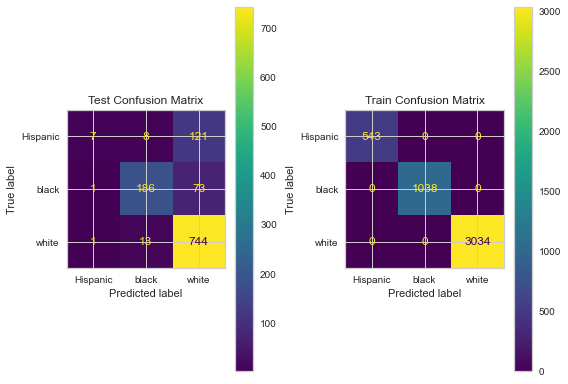

In [84]:
eval_metric(rfc, X_train2, y_train2, X_test2, y_test2)

### RF Model GridsearchCV

In [85]:
param_grid = {'n_estimators':[300, 400],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[1,2],
             }

rfc_model = RandomForestClassifier(class_weight="balanced", random_state=5)
rfc_grid = GridSearchCV(rfc_model,
                             param_grid,
                             verbose=2,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

rfc_grid.fit(X_train2,y_train2)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16], 'min_samples_split': [1, 2],
                         'n_estimators': [300, 400]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [86]:
rfc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 400}

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 38  13  85]
 [  5 209  46]
 [ 32  24 702]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.51      0.28      0.36       136
       black       0.85      0.80      0.83       260
       white       0.84      0.93      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.67      0.69      1154
weighted avg       0.80      0.82      0.81      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 525    0   18]
 [   1 1026   11]
 [  33    4 2997]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.94      0.97      0.95       543
       black       1.00      0.99      0.99      1038
       white       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.98      0.98      4615
weighted avg 

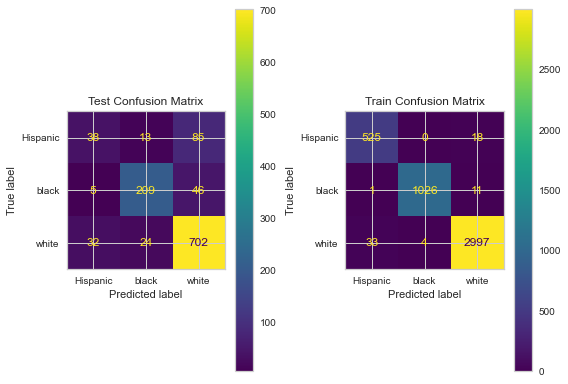

In [87]:
eval_metric(rfc_grid, X_train2, y_train2, X_test2, y_test2)

In [88]:
rfc_df = metric_df(rfc_grid, X_train2, y_train2, X_test2, y_test2, 'RF')
rfc_df

,RF
f1_Hispanic,[0.36018957345971564]
precision_Hispanic,[0.5066666666666667]
recall_Hispanic,[0.27941176470588236]


## 6. XGBoost

### Vanilla XGBoost Model

In [89]:
enc = OrdinalEncoder()

X3=df_ord.drop(["dodrace"], axis=1)
y3=enc.fit_transform(df_ord[["dodrace"]])

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, stratify=y3, random_state=5)

In [90]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [91]:
xgb_classifier = XGBClassifier(random_state=5)
xgb_classifier.fit(X_train3, y_train3, sample_weight=classes_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=5, reg_alpha=0, ...)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 66  12  58]
 [  5 230  25]
 [ 20  19 719]]
classification_report
              precision    recall  f1-score   support

         0.0       0.73      0.49      0.58       136
         1.0       0.88      0.88      0.88       260
         2.0       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.83      0.77      0.80      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
classification_report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       543
         1.0       1.00      1.00      1.00      1038
         2.0       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg 

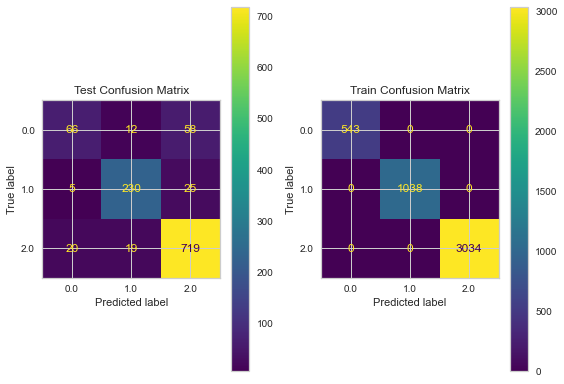

In [92]:
eval_metric(xgb_classifier, X_train3, y_train3, X_test3, y_test3)

### XGBoost Model GridsearchCV

In [93]:
param_grid = {"n_estimators":[400,500],'max_depth':[1,2,3], "learning_rate": [0.1,0.2]}
xgb_model = XGBClassifier(random_state=5)
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = recall_Hispanic, verbose=2, n_jobs = -1).fit(X_train3, y_train3,sample_weight=classes_weights)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [94]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 400}

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 91  12  33]
 [ 22 223  15]
 [132  50 576]]
classification_report
              precision    recall  f1-score   support

         0.0       0.37      0.67      0.48       136
         1.0       0.78      0.86      0.82       260
         2.0       0.92      0.76      0.83       758

    accuracy                           0.77      1154
   macro avg       0.69      0.76      0.71      1154
weighted avg       0.83      0.77      0.79      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 408   40   95]
 [  65  918   55]
 [ 516  131 2387]]
classification_report
              precision    recall  f1-score   support

         0.0       0.41      0.75      0.53       543
         1.0       0.84      0.88      0.86      1038
         2.0       0.94      0.79      0.86      3034

    accuracy                           0.80      4615
   macro avg       0.73      0.81      0.75      4615
weighted avg 

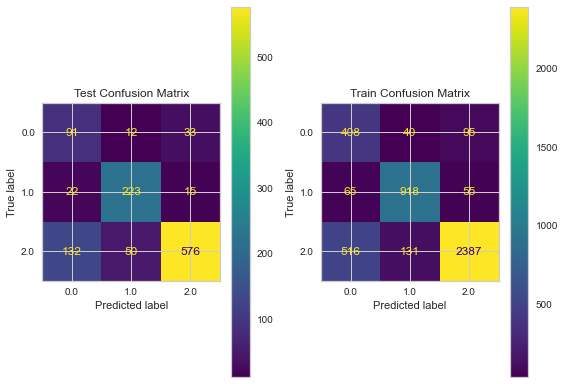

In [95]:
eval_metric(xgb_grid, X_train3, y_train3, X_test3, y_test3)

In [96]:
def metric_df_xg(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name:{"f1_Hispanic" : f1_score(y_test, y_pred, average=None, labels=[0]),
           "precision_Hispanic" : precision_score(y_test, y_pred, average=None, labels=[0]),
           "recall_Hispanic" : recall_score(y_test, y_pred, average=None, labels=[0])}}
    return pd.DataFrame(scores)

In [97]:
xg_df = metric_df_xg(xgb_grid, X_train3, y_train3, X_test3, y_test3, 'XGB')
xg_df

,XGB
f1_Hispanic,[0.47769028871391084]
precision_Hispanic,[0.37142857142857144]
recall_Hispanic,[0.6691176470588235]


## 7. AdaBoost

### Vanilla AB

In [98]:
ada_model = AdaBoostClassifier(random_state=5)
ada_model.fit(X_train2, y_train2)

AdaBoostClassifier(random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 30  15  91]
 [  8 212  40]
 [ 18  21 719]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.54      0.22      0.31       136
       black       0.85      0.82      0.83       260
       white       0.85      0.95      0.89       758

    accuracy                           0.83      1154
   macro avg       0.75      0.66      0.68      1154
weighted avg       0.81      0.83      0.81      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 116   44  383]
 [  19  854  165]
 [  58   61 2915]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.60      0.21      0.32       543
       black       0.89      0.82      0.86      1038
       white       0.84      0.96      0.90      3034

    accuracy                           0.84      4615
   macro avg       0.78      0.67      0.69      4615
weighted avg 

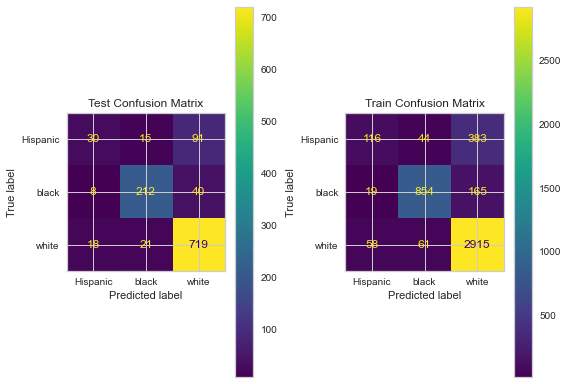

In [99]:
eval_metric(ada_model, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV AB

In [100]:
model_a = AdaBoostClassifier(random_state=5)

param_grid = {"n_estimators": [300,400], "learning_rate": [0.9, 1]}

ada_grid_model = GridSearchCV(model_a, param_grid, cv=5, scoring=recall_Hispanic ,n_jobs = -1)

ada_grid_model.fit(X_train2, y_train2,sample_weight=classes_weights)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=5), n_jobs=-1,
             param_grid={'learning_rate': [0.9, 1], 'n_estimators': [300, 400]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [101]:
ada_grid_model.best_params_

{'learning_rate': 0.9, 'n_estimators': 300}

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 85  11  40]
 [ 18 225  17]
 [123  22 613]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.38      0.62      0.47       136
       black       0.87      0.87      0.87       260
       white       0.91      0.81      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.77      0.73      1154
weighted avg       0.84      0.80      0.82      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 408   17  118]
 [  38  974   26]
 [ 451   61 2522]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.45      0.75      0.57       543
       black       0.93      0.94      0.93      1038
       white       0.95      0.83      0.88      3034

    accuracy                           0.85      4615
   macro avg       0.78      0.84      0.79      4615
weighted avg 

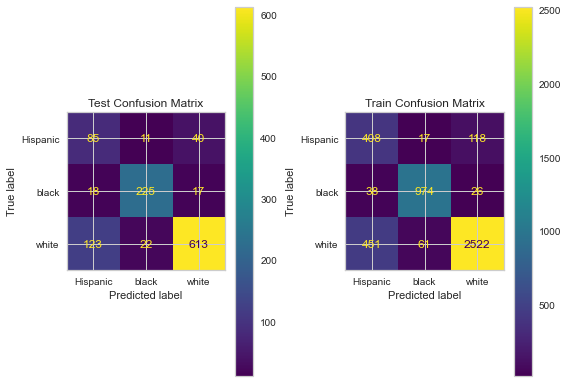

In [102]:
eval_metric(ada_grid_model, X_train2, y_train2, X_test2, y_test2)

In [103]:
ada_df = metric_df(ada_grid_model, X_train2, y_train2, X_test2, y_test2, 'Ada')
ada_df

,Ada
f1_Hispanic,[0.46961325966850825]
precision_Hispanic,[0.37610619469026546]
recall_Hispanic,[0.625]


## 8. GradientBoost

### Vanilla GB

In [104]:
grad_model = GradientBoostingClassifier(random_state=5)
grad_model.fit(X_train2, y_train2, sample_weight=classes_weights)

GradientBoostingClassifier(random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 91   9  36]
 [ 11 229  20]
 [ 80  39 639]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.50      0.67      0.57       136
       black       0.83      0.88      0.85       260
       white       0.92      0.84      0.88       758

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.77      1154
weighted avg       0.85      0.83      0.84      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 495   10   38]
 [  18  997   23]
 [ 259   70 2705]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.64      0.91      0.75       543
       black       0.93      0.96      0.94      1038
       white       0.98      0.89      0.93      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.92      0.88      4615
weighted avg 

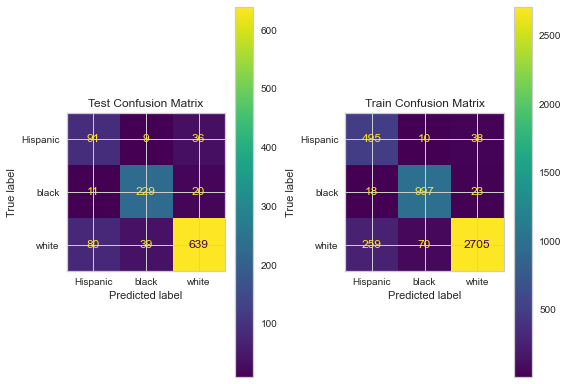

In [105]:
eval_metric(grad_model, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV GB

In [106]:
model_g = GradientBoostingClassifier(random_state=5)

param_grid = {"n_estimators":[200,300],
             "subsample":[1], "learning_rate": [0.1,0.5], 'max_depth':[2,3]}

grad_grid_model = GridSearchCV(model_g, param_grid, cv=5, scoring=recall_Hispanic ,n_jobs = -1)

grad_grid_model.fit(X_train2, y_train2, sample_weight=classes_weights)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [2, 3],
                         'n_estimators': [200, 300], 'subsample': [1]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [107]:
grad_grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 1}

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 92   9  35]
 [ 12 233  15]
 [ 95  38 625]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.46      0.68      0.55       136
       black       0.83      0.90      0.86       260
       white       0.93      0.82      0.87       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.85      0.82      0.83      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 474   15   54]
 [  30  979   29]
 [ 314   70 2650]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.58      0.87      0.70       543
       black       0.92      0.94      0.93      1038
       white       0.97      0.87      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.90      0.85      4615
weighted avg 

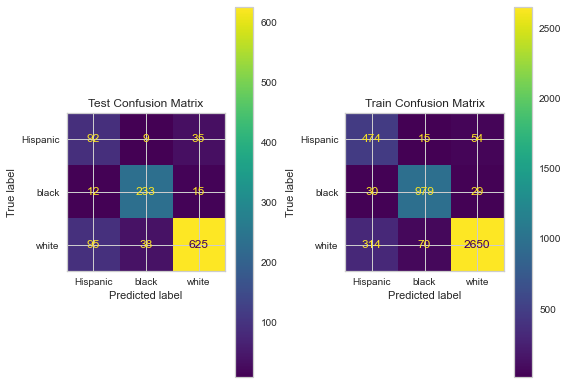

In [108]:
eval_metric(grad_grid_model, X_train2, y_train2, X_test2, y_test2)

In [109]:
grad_df = metric_df(grad_grid_model, X_train2, y_train2, X_test2, y_test2, 'Grad')
grad_df

,Grad
f1_Hispanic,[0.5492537313432836]
precision_Hispanic,[0.4623115577889447]
recall_Hispanic,[0.6764705882352942]


## 9. LightGBM

### Vanilla LG

In [110]:
lg_model = lgb.LGBMClassifier(random_state=5)
lg_model.fit(X_train2,y_train2,sample_weight=classes_weights)

LGBMClassifier(random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 70  13  53]
 [  7 227  26]
 [ 24  24 710]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.69      0.51      0.59       136
       black       0.86      0.87      0.87       260
       white       0.90      0.94      0.92       758

    accuracy                           0.87      1154
   macro avg       0.82      0.77      0.79      1154
weighted avg       0.87      0.87      0.87      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
classification_report
              precision    recall  f1-score   support

    Hispanic       1.00      1.00      1.00       543
       black       1.00      1.00      1.00      1038
       white       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg 

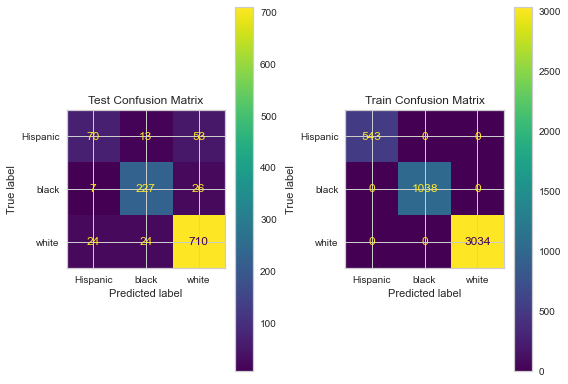

In [111]:
eval_metric(lg_model, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV LG

In [112]:
model_lg = lgb.LGBMClassifier()

param_grid = {
     'learning_rate': [0.1,0.05],
    'num_leaves': [2,4,6],
    'lambda_l1': [0, 1],
    'lambda_l2': [0, 1]
    }

lgb_grid_model = GridSearchCV(model_lg, param_grid,scoring=recall_Hispanic, n_jobs = -1)


lgb_grid_model.fit(X_train2, y_train2,sample_weight=classes_weights)

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'lambda_l1': [0, 1], 'lambda_l2': [0, 1],
                         'learning_rate': [0.1, 0.05],
                         'num_leaves': [2, 4, 6]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [113]:
lgb_grid_model.best_params_

{'lambda_l1': 1, 'lambda_l2': 1, 'learning_rate': 0.1, 'num_leaves': 4}

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 97  10  29]
 [ 15 229  16]
 [111  40 607]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.43      0.71      0.54       136
       black       0.82      0.88      0.85       260
       white       0.93      0.80      0.86       758

    accuracy                           0.81      1154
   macro avg       0.73      0.80      0.75      1154
weighted avg       0.85      0.81      0.82      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 421   29   93]
 [  45  948   45]
 [ 434  106 2494]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.47      0.78      0.58       543
       black       0.88      0.91      0.89      1038
       white       0.95      0.82      0.88      3034

    accuracy                           0.84      4615
   macro avg       0.76      0.84      0.79      4615
weighted avg 

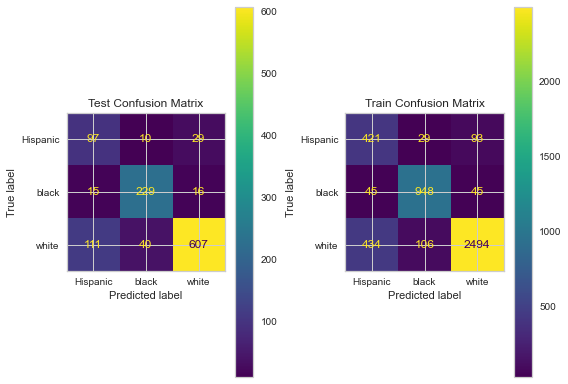

In [114]:
eval_metric(lgb_grid_model, X_train2, y_train2, X_test2, y_test2)

In [115]:
lg_df = metric_df(lgb_grid_model, X_train2, y_train2, X_test2, y_test2, 'LG')
lg_df

,LG
f1_Hispanic,[0.5403899721448467]
precision_Hispanic,[0.4349775784753363]
recall_Hispanic,[0.7132352941176471]


## Model Comparison

In [175]:
df_result = pd.concat([log,knn_df,svm_df,dt_df,rfc_df,xg_df,ada_df,grad_df,lg_df], axis=1)
df_result = df_result.sort_values(by="recall_Hispanic", axis=1, ascending=True).T

In [176]:
df_result = df_result.apply(lambda x: x.str[0])

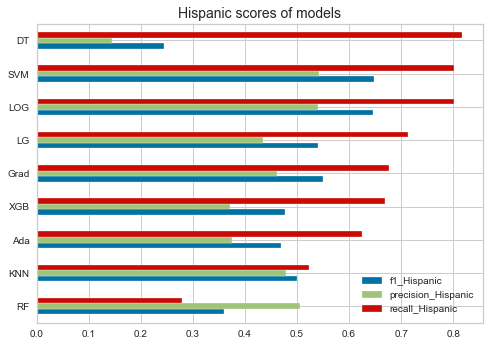

In [179]:
df_result.plot.barh()
plt.title("Hispanic scores of models", size=14);

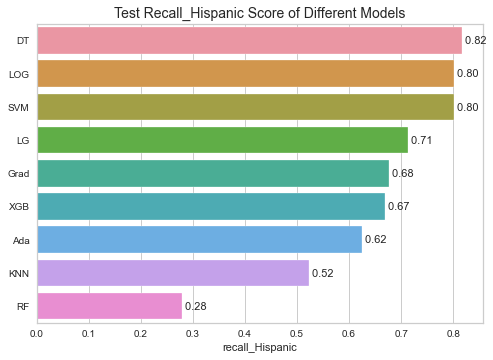

In [119]:
ax = sns.barplot(x = df_result["recall_Hispanic"], y=df_result["recall_Hispanic"].index)
plt.title("Test Recall_Hispanic Score of Different Models", size=14)
for patch in ax.patches:
    ax.text(
        patch.get_width(), 
        patch.get_y()+0.5,
        " {:.2f}".format(patch.get_width()), 
        fontsize=11
    )
plt.show()

**Although Decision tree model has the best score for recall_Hispanic, other scores of decision tree is very low. The scores of logistic regression and SVM are almost same and higher than other methods. Logistic regression method is simpler than SVM.  Therefore best model for the prediction of Hispanics is chosen as logistic regression.** 

**It is interesting that boosting methods did not give good scores for the prediction of Hispanics. For boost method LG, XGB, Gradient and Adaboost had recall_Hispanic scores between 0.71 and 0.62. However recall Hispanic result of Logistic regression and SVM is 0.80. Although decision tree recall Hispanic score is high random forest recall hispanic score is very low. This is caused by in DT it focused only on recall Hispanic and the other scores are terrible. However, random forest ever focused on recall hispanic, it tried to balance other scores by bagging.**

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [120]:
!pip install imblearn

In [144]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [123]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [124]:
X_over.shape

(9102, 232)

In [125]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [127]:
X_under.shape

(1629, 232)

In [126]:
y_under.value_counts()

black       543
white       543
Hispanic    543
Name: dodrace, dtype: int64

In [132]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"white": 2500})

In [129]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [130]:
y_resampled_over.value_counts()

white       3034
black       1038
Hispanic    1000
Name: dodrace, dtype: int64

In [133]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [134]:
y_resampled_under.value_counts()

white       2500
black       1038
Hispanic     543
Name: dodrace, dtype: int64

In [145]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [142]:
y_resampled.value_counts()

white       2500
black       1038
Hispanic    1000
Name: dodrace, dtype: int64

In [143]:
y_train.value_counts()

white       3034
black       1038
Hispanic     543
Name: dodrace, dtype: int64

## Logistic Over/Under Sampling

In [146]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [147]:
smote_pipeline = imbpipeline(steps=operations)

In [148]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'white': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 85   7  44]
 [ 13 232  15]
 [ 27   8 723]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.68      0.62      0.65       136
       black       0.94      0.89      0.92       260
       white       0.92      0.95      0.94       758

    accuracy                           0.90      1154
   macro avg       0.85      0.82      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 350   25  168]
 [  23  954   61]
 [ 122   35 2877]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.71      0.64      0.67       543
       black       0.94      0.92      0.93      1038
       white       0.93      0.95      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.84      0.85      4615
weighted avg 

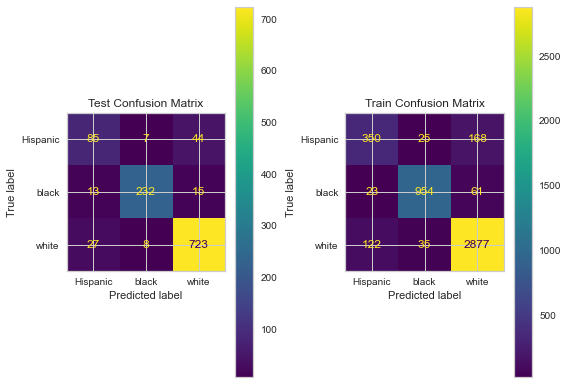

In [149]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [151]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [152]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.624864
test_precision_Hispanic    0.666650
test_recall_Hispanic       0.595051
dtype: float64

## SVC Over/Under Sampling

In [154]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", SVC(random_state=5))]

In [155]:
smote_pipeline = imbpipeline(steps=operations)

In [156]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'white': 2500})),
                ('scaler', MinMaxScaler()), ('log', SVC(random_state=5))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 64   8  64]
 [  6 227  27]
 [ 14   9 735]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.76      0.47      0.58       136
       black       0.93      0.87      0.90       260
       white       0.89      0.97      0.93       758

    accuracy                           0.89      1154
   macro avg       0.86      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 293   23  227]
 [  22  930   86]
 [  67   21 2946]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.77      0.54      0.63       543
       black       0.95      0.90      0.92      1038
       white       0.90      0.97      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.88      0.80      0.83      4615
weighted avg 

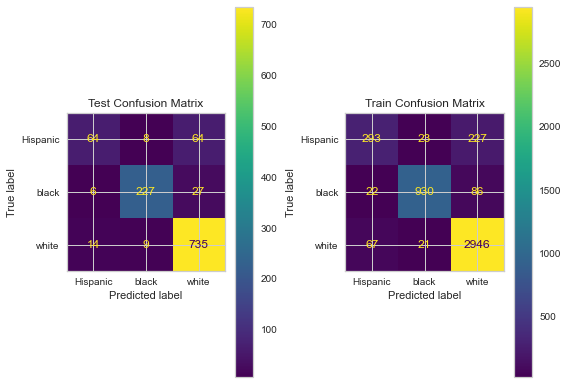

In [157]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [158]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [159]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.558407
test_precision_Hispanic    0.707009
test_recall_Hispanic       0.469966
dtype: float64

## Xgboost Over/ Under Sampling

In [154]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", SVC(random_state=5))]

In [155]:
smote_pipeline = imbpipeline(steps=operations)

In [156]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'white': 2500})),
                ('scaler', MinMaxScaler()), ('log', SVC(random_state=5))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 64   8  64]
 [  6 227  27]
 [ 14   9 735]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.76      0.47      0.58       136
       black       0.93      0.87      0.90       260
       white       0.89      0.97      0.93       758

    accuracy                           0.89      1154
   macro avg       0.86      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 293   23  227]
 [  22  930   86]
 [  67   21 2946]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.77      0.54      0.63       543
       black       0.95      0.90      0.92      1038
       white       0.90      0.97      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.88      0.80      0.83      4615
weighted avg 

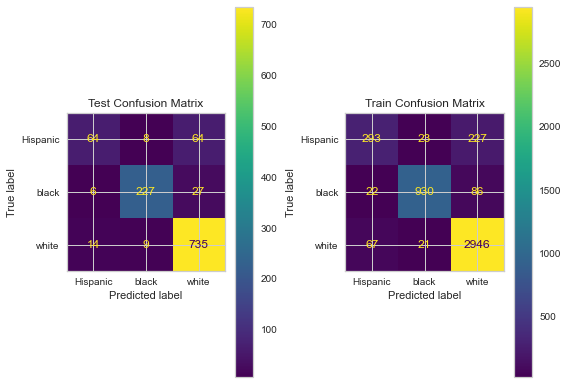

In [157]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [158]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [159]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.558407
test_precision_Hispanic    0.707009
test_recall_Hispanic       0.469966
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [190]:
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [191]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [194]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: black


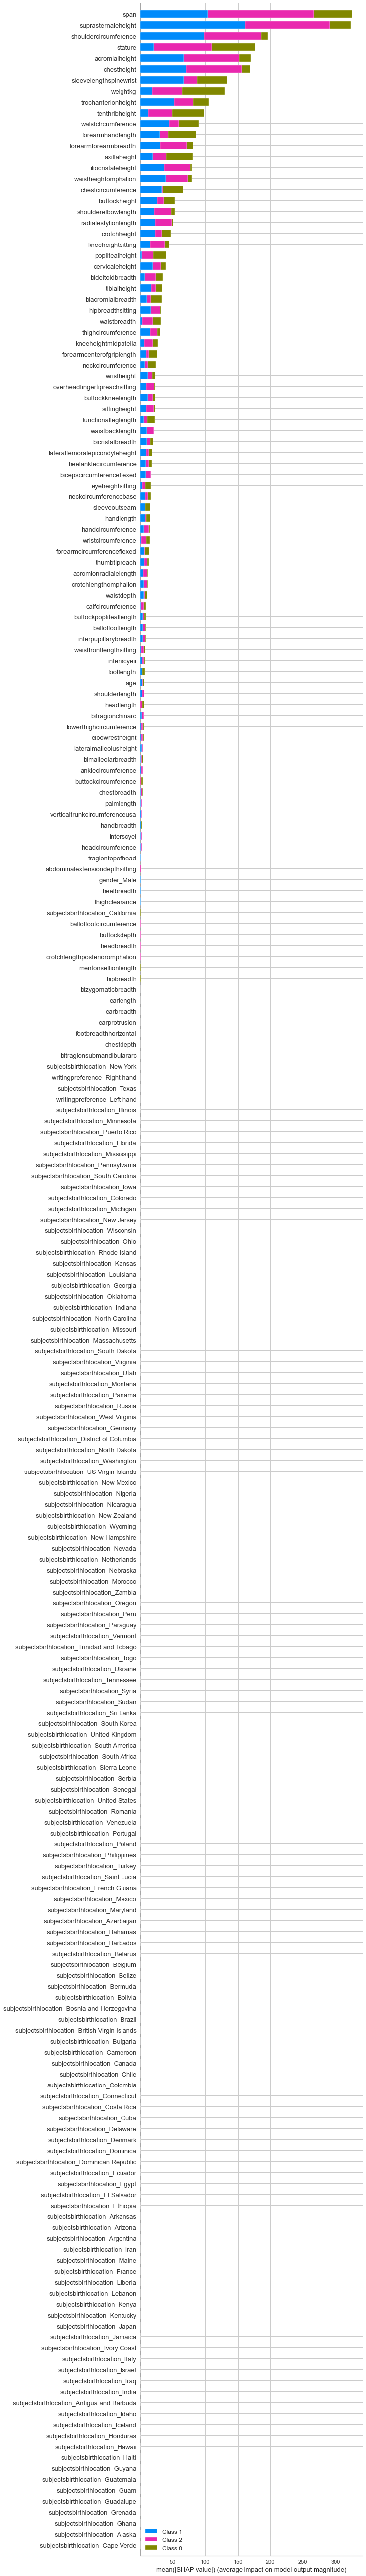

In [196]:
ax = shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

In [218]:
important_features = {}
for i in range(232):
    if (np.abs(shap_values[0][0][i])>1) & (np.abs(shap_values[1][0][i])>1) & (np.abs(shap_values[2][0][i])>1):
        important_features[X_train.columns[i]] = np.abs(shap_values[0][0][i]) + np.abs(shap_values[1][0][i])+ np.abs(shap_values[2][0][i])
important_features

{'acromialheight': 170.0538541359487,
 'acromionradialelength': 12.150192330983014,
 'axillaheight': 80.29528332726382,
 'balloffootlength': 8.706175518918032,
 'biacromialbreadth': 33.541156195321754,
 'bicristalbreadth': 20.261795946906208,
 'bideltoidbreadth': 34.40749571793363,
 'buttockheight': 53.16235322611574,
 'buttockkneelength': 23.22553558245977,
 'buttockpopliteallength': 9.059979891763518,
 'cervicaleheight': 39.65712955675059,
 'chestcircumference': 66.40374921106789,
 'chestheight': 169.6196850046317,
 'crotchheight': 47.001047789723586,
 'eyeheightsitting': 16.534871383007722,
 'forearmcenterofgriplength': 26.091289673154265,
 'forearmforearmbreadth': 81.42795419945082,
 'forearmhandlength': 86.16853041169192,
 'functionalleglength': 22.584689359080237,
 'handcircumference': 15.067733727596831,
 'handlength': 15.456002892527671,
 'heelanklecircumference': 17.866495998433734,
 'hipbreadthsitting': 32.42313947060204,
 'iliocristaleheight': 79.39342178881594,
 'interscyei

In [233]:
important_feature_df = pd.DataFrame(important_features, index=[0])

In [234]:
important_feature_df = important_feature_df.T
important_feature_df

,0
acromialheight,170.053854
acromionradialelength,12.150192
axillaheight,80.295283
balloffootlength,8.706176
biacromialbreadth,33.541156
bicristalbreadth,20.261796
bideltoidbreadth,34.407496
buttockheight,53.162353
buttockkneelength,23.225536
buttockpopliteallength,9.059980


In [235]:
important_feature_df = important_feature_df.reset_index()


In [237]:
important_feature_df.columns = ["features", "scores"]

In [239]:
important_feature_df["features"]

0                     acromialheight
1              acromionradialelength
2                       axillaheight
3                   balloffootlength
4                  biacromialbreadth
5                   bicristalbreadth
6                   bideltoidbreadth
7                      buttockheight
8                  buttockkneelength
9             buttockpopliteallength
10                   cervicaleheight
11                chestcircumference
12                       chestheight
13                      crotchheight
14                  eyeheightsitting
15         forearmcenterofgriplength
16             forearmforearmbreadth
17                 forearmhandlength
18               functionalleglength
19                 handcircumference
20                        handlength
21            heelanklecircumference
22                 hipbreadthsitting
23                iliocristaleheight
24                       interscyeii
25              kneeheightmidpatella
26                 kneeheightsitting
2

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

### Model with important features SHAP

In [243]:
X = df.loc[:,important_feature_df["features"]]

In [247]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model_if = Pipeline(steps=operations)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify = y)

In [252]:
final_model_if.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 77  16  43]
 [ 26 224  10]
 [186  38 534]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.27      0.57      0.36       136
       black       0.81      0.86      0.83       260
       white       0.91      0.70      0.79       758

    accuracy                           0.72      1154
   macro avg       0.66      0.71      0.66      1154
weighted avg       0.81      0.72      0.75      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 343   66  134]
 [  97  894   47]
 [ 733  121 2180]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.29      0.63      0.40       543
       black       0.83      0.86      0.84      1038
       white       0.92      0.72      0.81      3034

    accuracy                           0.74      4615
   macro avg       0.68      0.74      0.68      4615
weighted avg 

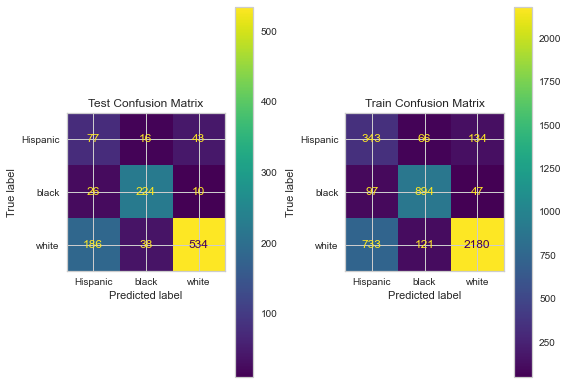

In [253]:
eval_metric(final_model_if, X_train, y_train, X_test, y_test)

In [255]:
operations = [("scaler", MinMaxScaler()), ("log", SVC(class_weight='balanced',random_state=5))]
svm_model_if = Pipeline(steps=operations)
svm_model_if.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log', SVC(class_weight='balanced', random_state=5))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 83  15  38]
 [ 22 228  10]
 [174  32 552]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.30      0.61      0.40       136
       black       0.83      0.88      0.85       260
       white       0.92      0.73      0.81       758

    accuracy                           0.75      1154
   macro avg       0.68      0.74      0.69      1154
weighted avg       0.83      0.75      0.77      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 383   47  113]
 [  68  938   32]
 [ 698  120 2216]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.33      0.71      0.45       543
       black       0.85      0.90      0.88      1038
       white       0.94      0.73      0.82      3034

    accuracy                           0.77      4615
   macro avg       0.71      0.78      0.72      4615
weighted avg 

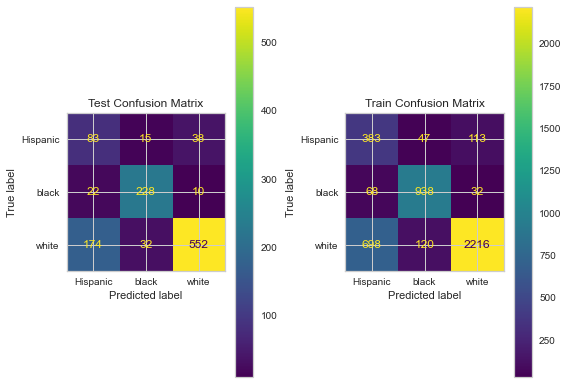

In [256]:
eval_metric(svm_model_if, X_train, y_train, X_test, y_test)

**Only important features (SHAP) recall Hispanic scores of logistic regression and SVM decrease to 0.57 and 0.61** 

### Model with important features log

In [277]:
importance = log_model2.coef_[0]
list_of_tuples = list(zip(X_train.columns, importance)) 
df_imp = pd.DataFrame(list_of_tuples,
                  columns = ['features', 'importance']) 
df_imp

,features,importance
0,abdominalextensiondepthsitting,-0.056585
1,acromialheight,-0.163754
2,acromionradialelength,0.068558
3,anklecircumference,-0.050564
4,axillaheight,-0.399201
...,...,...
227,subjectsbirthlocation_Wisconsin,0.258693
228,subjectsbirthlocation_Wyoming,-0.014206
229,subjectsbirthlocation_Zambia,-0.002462
230,writingpreference_Left hand,0.319775


In [320]:
important_features_log = []
for i in range(232):
    if np.abs(df_imp.importance[i])>0.1:
        important_features_log.append(df_imp.features[i])
len(important_features_log)

125

In [321]:
X = pd.get_dummies(data=df, drop_first=True).loc[:,important_features_log]

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify = y)

In [323]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
log_model3 = Pipeline(steps=operations)

log_model3.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[105   7  24]
 [ 10 238  12]
 [ 95  29 634]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.50      0.77      0.61       136
       black       0.87      0.92      0.89       260
       white       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
--------------------------------------
Confusion_matrix:
[[ 444   21   78]
 [  44  949   45]
 [ 410  115 2509]]
classification_report
              precision    recall  f1-score   support

    Hispanic       0.49      0.82      0.62       543
       black       0.87      0.91      0.89      1038
       white       0.95      0.83      0.89      3034

    accuracy                           0.85      4615
   macro avg       0.77      0.85      0.80      4615
weighted avg 

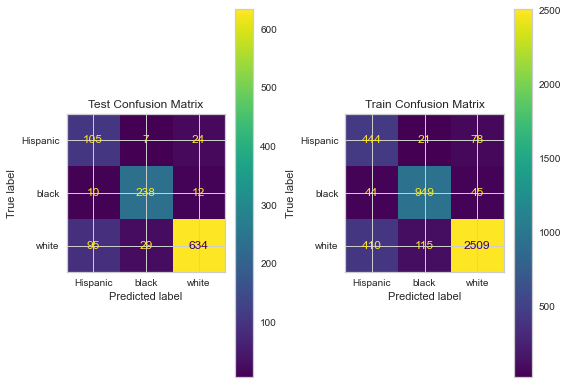

In [324]:
eval_metric(log_model3, X_train, y_train, X_test, y_test)

**If we choose some (125 out of 232) important features from dummy file the recall score decreased to 0.77.**

### Final Model

In [171]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [172]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [276]:
df_imp.columns[0]

'columns'

In [173]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8019252282664313

In [174]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7942959001782531

**SVM Cohen Kappa and matthews_corrcoef scores**

In [188]:
svm_model = SVC(class_weight="balanced",random_state=5)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

matthews_corrcoef(y_test, y_pred_svm)

0.7606956460516455

In [189]:
cohen_kappa_score(y_test, y_pred_svm)

0.7556803265499691

### Dump final model

In [327]:
import pickle

pickle.dump(final_model, open("final_soldier_race", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___